In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Generate random data
np.random.seed(0)
num_samples = 1000

In [3]:
# Simulate features (binary questions) for each client
features = np.random.randint(0, 2, size=(num_samples, 10))

In [4]:
# Simulate labels (0 for Not Bought, 1 for Bought) based on some criteria
# You can replace this with your own criteria or use a different approach to generate labels.
def generate_labels(features):
    return np.random.randint(0, 2, size=len(features))

labels = generate_labels(features)

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [6]:
# Standardize features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Build a linear regression model using Keras
model = keras.Sequential([
    keras.layers.Input(shape=(10,)),
    keras.layers.Dense(1, activation='linear')
])

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Lists to store accuracy values during training
train_accuracy = []
test_accuracy = []

In [16]:
# Train the model
epochs = 50
for epoch in range(epochs):
    model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)

    # Calculate and append training accuracy
    train_predictions = np.round(model.predict(X_train)).flatten()
    train_acc = accuracy_score(y_train, train_predictions)
    train_accuracy.append(train_acc)

    # Calculate and append test accuracy
    test_predictions = np.round(model.predict(X_test)).flatten()
    test_acc = accuracy_score(y_test, test_predictions)
    test_accuracy.append(test_acc)

    print(f"Epoch {epoch + 1}/{epochs} - Train Accuracy: {train_acc:.2f} - Test Accuracy: {test_acc:.2f}")

7/7 [==============================] - 0s 2ms/step
Epoch 1/50 - Train Accuracy: 0.53 - Test Accuracy: 0.49
7/7 [==============================] - 0s 3ms/step
Epoch 2/50 - Train Accuracy: 0.56 - Test Accuracy: 0.49
7/7 [==============================] - 0s 2ms/step
Epoch 3/50 - Train Accuracy: 0.55 - Test Accuracy: 0.49
7/7 [==============================] - 0s 2ms/step
Epoch 4/50 - Train Accuracy: 0.56 - Test Accuracy: 0.52
7/7 [==============================] - 0s 2ms/step
Epoch 5/50 - Train Accuracy: 0.54 - Test Accuracy: 0.53
7/7 [==============================] - 0s 2ms/step
Epoch 6/50 - Train Accuracy: 0.54 - Test Accuracy: 0.55
7/7 [==============================] - 0s 2ms/step
Epoch 7/50 - Train Accuracy: 0.55 - Test Accuracy: 0.53
7/7 [==============================] - 0s 2ms/step
Epoch 8/50 - Train Accuracy: 0.55 - Test Accuracy: 0.53
7/7 [==============================] - 0s 2ms/step
Epoch 9/50 - Train Accuracy: 0.54 - Test Accuracy: 0.55
7/7 [==============================] 

In [17]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

7/7 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5500
Test Loss: [0.24949313700199127, 0.550000011920929]


In [18]:
# Make predictions
predictions = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [19]:
# Calculate accuracy
rounded_predictions = np.round(predictions).flatten()
accuracy = accuracy_score(y_test, rounded_predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.55


In [20]:
# Create a confusion matrix
cm = confusion_matrix(y_test, rounded_predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[37 59]
 [31 73]]


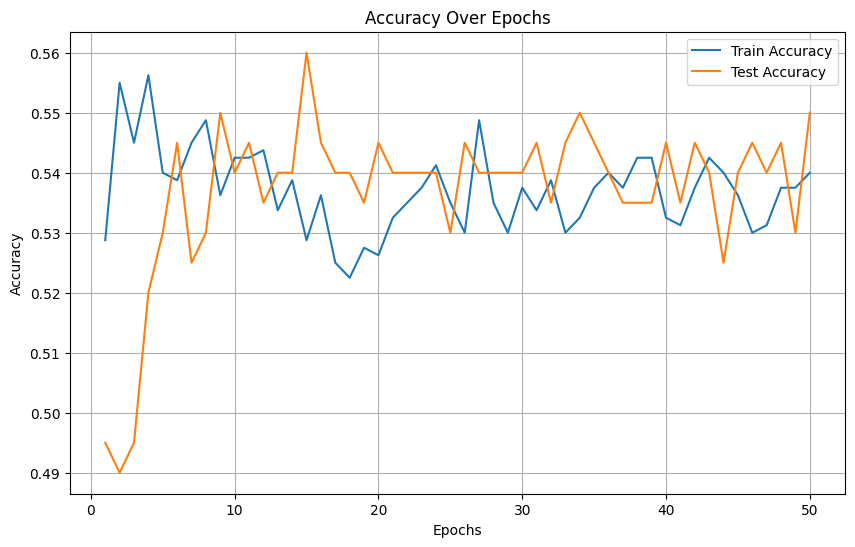

In [21]:
# Plot accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()